In [1]:
%matplotlib inline
from im2txt.eval_tools.pycocotools.coco import COCO
from im2txt.eval_tools.pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
dataDir = '/media/meteorshub/resource/dataset/mscoco'
workingDir = '/home/meteorshub/code/im2txt/im2txt/eval_tools'
dataType = 'val2014'
algName = 'meteorshub'
annFile = '%s/annotations/captions_%s.json' % (dataDir, dataType)
subtypes = ['results', 'evalImgs', 'eval']
[resFile, evalImgsFile, evalFile] = \
    ['%s/results/captions_%s_%s_%s.json' % (workingDir, dataType, algName, subtype) for subtype in subtypes]

In [3]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...


0:00:00.594558
creating index...


index created!
Loading and preparing results...     
DONE (t=0.03s)
creating index...
index created!


In [4]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
cocoEval.evaluate()

tokenization...


setting up scorers...
computing Bleu score...
{'reflen': 4472, 'guess': [4341, 3839, 3337, 2835], 'testlen': 4341, 'correct': [3225, 1711, 792, 329]}
ratio: 0.970706618962
Bleu_1: 0.721
Bleu_2: 0.558
Bleu_3: 0.416
Bleu_4: 0.300
computing METEOR score...


METEOR: 0.235
computing Rouge score...
ROUGE_L: 0.528
computing CIDEr score...


CIDEr: 0.916


In [5]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.916
Bleu_4: 0.300
Bleu_3: 0.416
Bleu_2: 0.558
Bleu_1: 0.721
ROUGE_L: 0.528
METEOR: 0.235


In [6]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

ground truth captions
The skateboarder is putting on a show using the picnic table as his stage.
A skateboarder pulling tricks on top of a picnic table.
A man riding on a skateboard on top of a table.
A skate boarder doing a trick on a picnic table.
A person is riding a skateboard on a picnic table with a crowd watching.


generated caption (CIDEr score 1.0)
a man riding a skateboard on a skateboard .


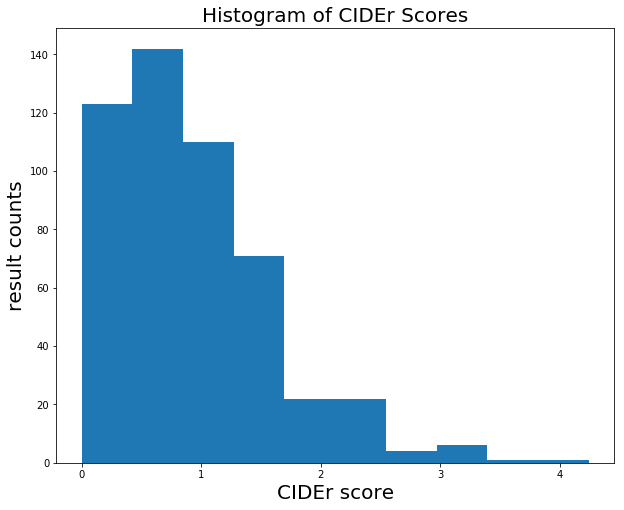

In [7]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [8]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))